In [ ]:
# Read Image
# Load Likelihood values stored into 64 bin histograrms

# if  likelihood is  higher that means that pixel is belongs to iris or pupil region

In [1]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def BayesEstimation(img,histogramBinValuesPath,thresh=0.9):
    
    r_img = img[:,:,::-1][:,:,0]
    
    imgGauss = cv2.GaussianBlur(r_img,(3,3),1)
    
    with open(histogramBinValuesPath,"r") as f:
        hist = [float(j.rstrip()) for j in f.readlines()]
        
    imgR_bin = np.zeros((r_img.shape[0],r_img.shape[1])).astype(np.uint8)
    
    
    
    for row in range(r_img.shape[0]):
    
        for column in range(r_img.shape[1]):
            
            binNo = (imgGauss[row,column]) // 4
            
            
            # print(binNo)
            likelihood = hist[binNo]
            
            
            if likelihood >= thresh:
                imgR_bin[row,column] = 1
                
                
    plt.imshow(imgR_bin)
    plt.show()
    
    
    
    analysis = cv2.connectedComponentsWithStats(imgR_bin,
                                           4,
                                            cv2.CV_32S)
    (totalLabels, label_ids, values, centroid) = analysis
    
    
    return centroid[-1]
    
    

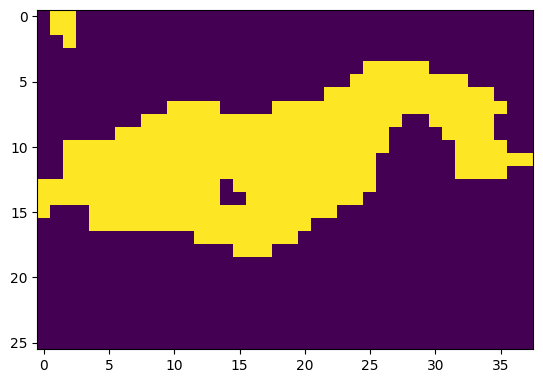

[17.4751773  10.94680851]


In [22]:
print(BayesEstimation(img=img,histogramBinValuesPath=text_path,thresh=0.9))

In [18]:
# Read Image
img = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/BIOID/eyes/BioID_0103_left.png")

In [3]:
# Histogram Path

# % likelihood values of range of intensity values belonging to the iris and pupil class
text_path = "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-MainPipeLine/BayesClassifier/MatLab/ScleraSkinIris.txt"

with open(text_path,"r") as f:
    hist = [float(j.rstrip()) for j in f.readlines()]
    
r_img = img[:,:,0]

# plt.imshow(r_img)
# plt.show()

In [4]:
imgGauss = cv2.GaussianBlur(r_img,(3,3),1)

# plt.imshow(imgGauss)

# imgGauss = r_img

In [5]:
imgR_bin = np.zeros((r_img.shape[0],r_img.shape[1])).astype(np.uint8)




In [10]:
thresh = 2.0
for row in range(r_img.shape[0]):
    
    for column in range(r_img.shape[1]):
        
        binNo = (imgGauss[row,column]) // 4
        
        
        # print(binNo)
        likelihood = hist[binNo]
        
        
        if likelihood >= thresh:
            imgR_bin[row,column] = 1
    

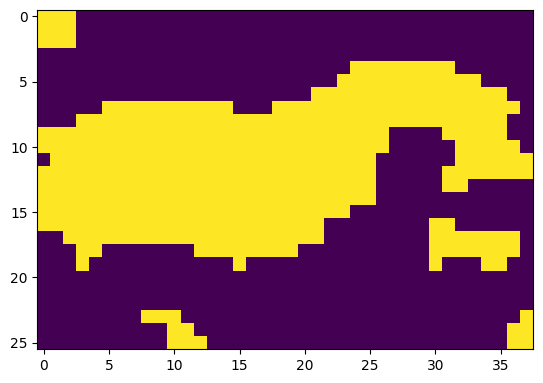

In [11]:
plt.imshow(imgR_bin)

In [12]:
print(imgR_bin.shape)

# np.unique(imgR_bin)

for i in range(0,totalLabels):
    x= values[i,cv2.CC_STAT_LEFT]
    y= values[i,cv2.CC_STAT_TOP]
    w= values[i,cv2.CC_STAT_WIDTH]
    h= values[i,cv2.CC_STAT_HEIGHT]
    
    print(x,y,w,h)



(26, 38)


NameError: name 'totalLabels' is not defined

In [14]:
analysis = cv2.connectedComponentsWithStats(imgR_bin,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

In [15]:
# label_ids
np.unique(label_ids)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [16]:
# label_ids

print(centroid[-1])

[36.6 24.2]


In [ ]:
output = np.zeros(imgR_bin.shape,dtype='uint8')


for i in range(totalLabels):
    
    area = values[i,cv2.CC_STAT_AREA]
    
    if area < 200:
        componentMask =  (label_ids ==i).astype('uint8') * 255
        
        output  = cv2.bitwise_or(output,componentMask)

In [ ]:
plt.imshow(output)

In [80]:
contours, hierarchy = cv2.findContours(imgR_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cnt = max(contours, key = cv2.contourArea) # finding contour with #maximum area
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])



print(cx,cy)

16 10


In [ ]:
def EuclideanDistance(centerArray,img):
    
    centerX,centerY = img.shape[1]/2,img.shape[0]/2
    
    

    return np.argmin((((centerArray[:,0]- centerX) ** 2 + (centerArray[:,1]- centerY))**0.5))



In [ ]:
centroids[EuclideanDistance(centroids,imgR_bin)]

In [ ]:
output = cv2.connectedComponentsWithStats(imgR_bin,4,cv2.CV_32SC1)

In [ ]:
numLabels,labeles,stats,centroids = output

In [ ]:

imgCenterX, imgCenterY = imgR_bin.shape[1]/2,imgR_bin.shape[0]/2


print(imgCenterX)
print(imgCenterY)

In [ ]:
np.argmin(((centroids[:,0] - imgCenterX) **2 +(centroids[:,1] - imgCenterY) **2 ) **2)

# Bayes Classifier Iris Center Estimation